**Aim: Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.**

***Exploratory Data Analysis***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
test_data = pd.read_csv("test.csv")
train_data = pd.read_csv("train.csv")

In [3]:
test_data.describe

<bound method NDFrame.describe of      PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked 

In [4]:
train_data.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

**Droping rows with missing values**

In [5]:
test_data.dropna(axis = 0, inplace = True)
train_data.dropna(axis = 0, inplace = True)

In [6]:
test_data.describe

<bound method NDFrame.describe of      PassengerId  Pclass                                               Name  \
12           904       1      Snyder, Mrs. John Pillsbury (Nelle Stevenson)   
14           906       1  Chaffee, Mrs. Herbert Fuller (Carrie Constance...   
24           916       1    Ryerson, Mrs. Arthur Larned (Emily Maria Borie)   
26           918       1                       Ostby, Miss. Helene Ragnhild   
28           920       1                            Brady, Mr. John Bertram   
..           ...     ...                                                ...   
404         1296       1                       Frauenthal, Mr. Isaac Gerald   
405         1297       2       Nourney, Mr. Alfred (Baron von Drachstedt")"   
407         1299       1                         Widener, Mr. George Dunton   
411         1303       1    Minahan, Mrs. William Edward (Lillian E Thorpe)   
414         1306       1                       Oliva y Ocana, Dona. Fermina   

        Sex   Age

In [7]:
train_data.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
..                                 

**Finding relation between Sex of passenger and their survival rate**

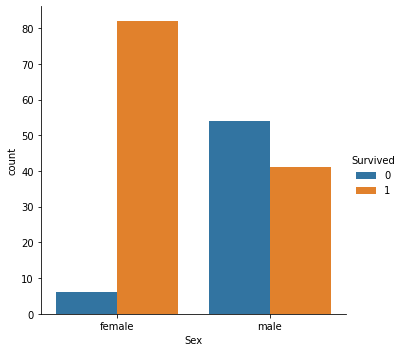

In [8]:
sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = train_data)

We can say roughly 40% of the males and 90% of the females survived

**Finding the rate of survival of a person based on their socio-economic status (label- pclass)**

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

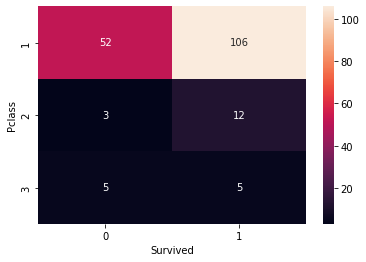

In [10]:
group = train_data.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
 

sns.heatmap(pclass_survived, annot = True, fmt ="d")

A person with a higher class ticket has more chances of survival

**Relation between age and survival**

In [33]:
train_data["Age_Binned"] = pd.cut(x = train_data["Age"],  
                                  bins=np.linspace(min(train_data["Age"]), 
                max(train_data["Age"]),4), labels = ['Children', 'Adolescents', 'Adults'] , include_lowest = True )

In [30]:
Age_Binned

1      Adolescents
3      Adolescents
6           Adults
10        Children
11          Adults
          ...     
871    Adolescents
872    Adolescents
879         Adults
887       Children
889       Children
Name: Age, Length: 183, dtype: category
Categories (3, object): ['Children' < 'Adolescents' < 'Adults']

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 66.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Age_Binned', ylabel='Survived'>

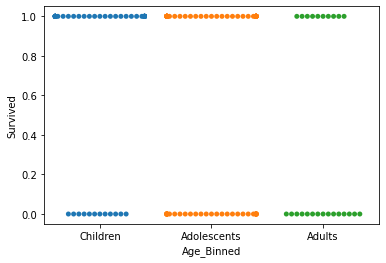

In [67]:
sns.swarmplot(x = 'Age_Binned', y ='Survived', data = train_data )

Chances of survivng is better in case of children and adolescents

**Fare and Survival**

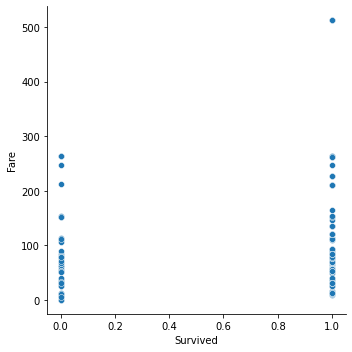

In [73]:
sns.relplot(x ='Survived', y = 'Fare', data = train_data )

Survivals are more for people paying more than 100bucks as fare

**Number of family members and Survival**

In [74]:
train_data["No.Fm.Mem"] = train_data["SibSp"] + train_data["Parch"] 

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 34.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Survived', ylabel='No.Fm.Mem'>

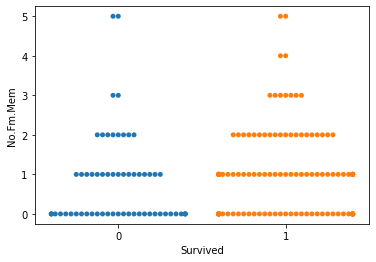

In [79]:
sns.swarmplot(x ='Survived', y = 'No.Fm.Mem', data = train_data )

Rate of survival is more for people with less family members on board